<h2 style="color:green" align="center">Machine Learning With Python: Linear Regression With One Variable</h2>

<h3 style="color:purple">Sample problem of predicting home price in monroe, new jersey (USA)</h3>

Below table represents current home prices in monroe township based on square feet area, new jersey

<img src="homepricetable.JPG" style="width:370px;height:250px">

**Problem Statement**: Given above data build a machine learning model that can predict home prices based on square feet area


You can represent values in above table as a scatter plot (values are shown in red markers). After that one can draw a straight line that best fits values on chart. 

<img src="scatterplot.JPG" style="width:600px;height:370px">

You can draw multiple lines like this but we choose the one where total sum of error is minimum

<img src="equation.PNG" style="width:600px;height:370px" >

You might remember about linear equation from your high school days math class. Home prices can be presented as following equation,

home price = m * (area) + b

Generic form of same equation is,

<img src="linear_equation.png" >

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import linear_model


In [2]:
df = pd.read_csv("homeprices.csv")

In [3]:
df

,area,price
0,2600,550000
1,3000,565000
2,3200,610000
3,3600,680000
4,4000,725000


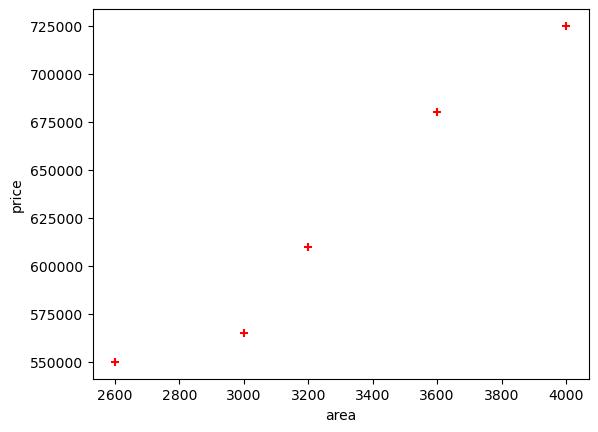

In [4]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price, color = 'red', marker ='+')

In [5]:
reg = linear_model.LinearRegression() # Use shift+tab fro documentation
reg.fit(df[['area']].values,df.price)

LinearRegression()

In [6]:
import random
x = random.randint(1000,10000)
reg.predict([[x]])

array([748887.84246575])

In [7]:
x

4185

In [8]:
m = reg.coef_
m

array([135.78767123])

In [9]:
b = reg.intercept_
b

180616.43835616432

In [10]:
y = m*x+b
y

array([748887.84246575])

In [11]:
d= pd.read_csv('areas.csv')
d.head()

,area
0,1000
1,1500
2,2300
3,3540
4,4120


In [12]:
p = reg.predict(d)

C:\Users\YASH\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


In [13]:
d['prices'] = p

In [14]:
d.to_csv("prediction1.csv",index = False)

C:\Users\YASH\anaconda3\Lib\site-packages\sklearn\base.py:457: UserWarning: X has feature names, but LinearRegression was fitted without feature names
  warnings.warn(


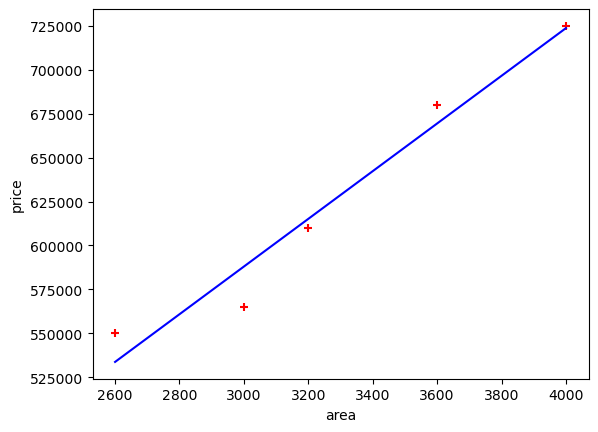

In [15]:
plt.xlabel('area')
plt.ylabel('price')
plt.scatter(df.area,df.price, color = 'red', marker ='+')
plt.plot(df.area,reg.predict(df[['area']]), color = 'blue')

# EXERCISE

<p >Predict canada's per capita income in year 2020. There is an exercise folder here on github at same level as this notebook, download that and you will find canada_per_capita_income.csv file. Using this build a regression model and predict the per capita income fo canadian citizens in year 2020</p>

### Answer = 41288.69409442

In [16]:
dc = pd.read_csv('canada_per_capita_income.csv')

In [17]:
dc.head()

,year,per capita income (US$)
0,1970,3399.299037
1,1971,3768.297935
2,1972,4251.175484
3,1973,4804.463248
4,1974,5576.514583


In [18]:
income =dc['per capita income (US$)']

In [19]:
income.head()

0    3399.299037
1    3768.297935
2    4251.175484
3    4804.463248
4    5576.514583
Name: per capita income (US$), dtype: float64

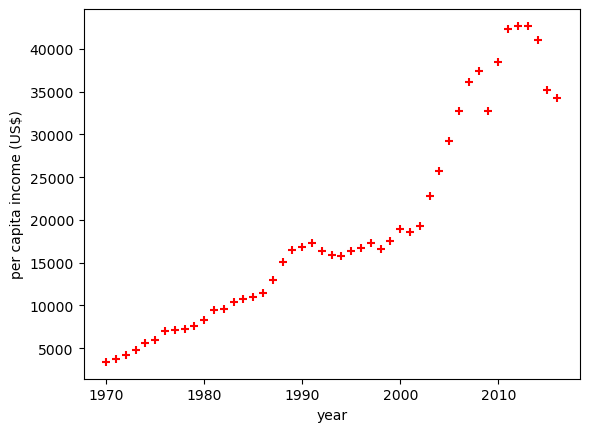

In [20]:
plt.xlabel('year')
plt.ylabel('per capita income (US$)')
plt.scatter(dc.year, income,color='red',marker='+')

In [21]:
year = dc.drop('per capita income (US$)', axis='columns')
year.head()

,year
0,1970
1,1971
2,1972
3,1973
4,1974


In [22]:
reg_canada = linear_model.LinearRegression()

In [23]:
reg_canada.fit(year,income)

LinearRegression()

In [24]:
reg_canada.predict([[2020]])

C:\Users\YASH\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([41288.69409442])

# SAVING THE MODEL


In [25]:
import pickle

In [27]:
with open ('model_pickle','wb') as f:
    pickle.dump(reg,f)

In [28]:
with open ('model_pickle','rb') as f:
    mp = pickle.load(f)

In [30]:
mp.predict([[5000]])

array([859554.79452055])

In [34]:
import joblib

In [36]:
joblib.dump(reg,'model_joblib')

['model_joblib']

In [37]:
mj = joblib.load('model_joblib')

In [39]:
mj.predict([[5000]])

array([859554.79452055])

In [41]:
mj.coef_

array([135.78767123])